In [40]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Decision Tree分割點之選擇 :

## 定義Entropy與Gini Impurity的資訊量函式
Define the formula of Entropy and Gini Impurity:

\begin{align}
Entropy(t) = -\sum_{i=1}^{C}  p(i | t)  log_2 p(i | t)
\end{align}

\begin{align}
Gini(t) = \sum_{i=1}^{C} (1- p(i | t) ) = 1 - \sum_{i=1}^{C} p(i | t)^2
\end{align}



In [41]:
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

In [42]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

## 不同分割之Impurity比較
Comparison of different segments

Section: Decision tree
----------------------------------------------------------------------------------------


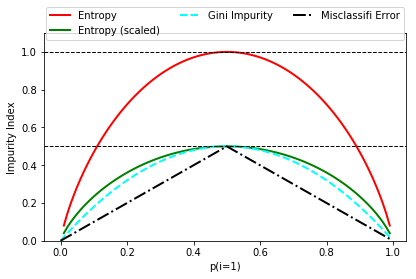

In [43]:
print(88 * '=')
print('Section: Decision tree')
print(88 * '-')

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini Impurity', 'Misclassifi Error'],
                          ['-', '-', '--', '-.'],
                          [ 'red', 'green', 'cyan','black', 'lightgray']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
plt.show()